In [3]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr

uk_crs = 'EPSG:27700'


In [51]:
pd.read_csv("/Users/alison/Documents/RAPID/data_results/ff/events/wrz_127.csv")

,RZ_ID,ensemble,event,start,end,severity,duration,backcast,buffer,ep_total,ep_mean,q50_anomaly_total,q75_anomaly_total,q90_anomaly_total,q50_deficit_total
0,127,FF1,1.0,2071-05-01,2071-07-01,24.0,61 days,3.0,25.0,-111.485972,-27.871493,-12.877163,-28.646857,-40.466796,15.594913
1,127,FF1,1.0,2071-05-01,2071-07-01,24.0,61 days,3.0,50.0,-378.912348,-27.065168,-33.781518,-88.975447,-130.345234,46.098960
2,127,FF1,1.0,2071-05-01,2071-07-01,24.0,61 days,3.0,100.0,-1161.192277,-26.390734,-76.495381,-249.962016,-379.981346,120.379816
3,127,FF1,1.0,2071-05-01,2071-07-01,24.0,61 days,3.0,150.0,-1947.013098,-26.310988,-122.750136,-414.489477,-633.158350,193.310302
4,127,FF1,1.0,2071-05-01,2071-07-01,24.0,61 days,3.0,200.0,-2277.046571,-26.172949,-132.304981,-475.295828,-732.379503,213.863996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16267,127,FF100,765.0,2091-10-01,2091-11-01,28.0,31 days,36.0,50.0,-1017.383487,-72.670249,-148.293747,-282.865435,-385.073073,161.197447
16268,127,FF100,765.0,2091-10-01,2091-11-01,28.0,31 days,36.0,100.0,-3140.263678,-71.369629,-408.838781,-831.778373,-1153.002377,459.444590
16269,127,FF100,765.0,2091-10-01,2091-11-01,28.0,31 days,36.0,150.0,-5270.631076,-71.224744,-676.871021,-1388.178516,-1928.418887,766.723125
16270,127,FF100,765.0,2091-10-01,2091-11-01,28.0,31 days,36.0,200.0,-6172.386003,-70.946966,-771.614048,-1607.880967,-2243.028431,881.923858


In [47]:
archive = zipfile.ZipFile('/Users/alison/Downloads/w@h effective precip.zip', 'r')
file = archive.namelist()[1]
file = archive.open(file)
pd.read_csv(file)

,Unnamed: 0,lat,lon,time,ensemble,prbc,pepm,effective_precip
0,0,50.191850,-5.306366,1901-01-16,BS1,0.000032,0.421350,-0.421318
1,1,50.191850,-5.306366,1901-02-16,BS1,0.000024,0.567474,-0.567450
2,2,50.191850,-5.306366,1901-03-16,BS1,0.000026,0.866646,-0.866620
3,3,50.191850,-5.306366,1901-04-16,BS1,0.000020,1.351318,-1.351297
4,4,50.191850,-5.306366,1901-05-16,BS1,0.000018,2.182831,-2.182814
...,...,...,...,...,...,...,...,...
488395,488395,52.525043,1.707580,1901-08-16,BS100,0.000027,2.606596,-2.606569
488396,488396,52.525043,1.707580,1901-09-16,BS100,0.000015,1.675402,-1.675387
488397,488397,52.525043,1.707580,1901-10-16,BS100,0.000006,0.843623,-0.843617
488398,488398,52.525043,1.707580,1901-11-16,BS100,0.000051,0.513901,-0.513850


In [43]:
# with zipfile.ZipFile("/Users/alison/Documents/RAPID/data_input/w@h/bs.zip", 'r') as archive:
with zipfile.ZipFile("/Users/alison/Documents/RAPID/data_input/w@h/bs.zip", 'r') as archive:
    file = archive.namelist()[0]
    file = archive.open(file)
    df = pd.read_csv(file)

In [44]:
df

,Unnamed: 0,lat,lon,time,ensemble,prbc,pepm,effective_precip
0,0,50.191850,-5.306366,1900-01-16,BS1,0.000053,0.268349,-0.268296
1,1,50.191850,-5.306366,1900-02-16,BS1,0.000035,0.475112,-0.475077
2,2,50.191850,-5.306366,1900-03-16,BS1,0.000023,0.768194,-0.768171
3,3,50.191850,-5.306366,1900-04-16,BS1,0.000022,1.241798,-1.241776
4,4,50.191850,-5.306366,1900-05-16,BS1,0.000011,2.531808,-2.531797
...,...,...,...,...,...,...,...,...
488395,488395,52.739746,1.628519,1900-08-16,BS53,0.000021,1.890523,-1.890502
488396,488396,52.739746,1.628519,1900-09-16,BS53,0.000043,1.917600,-1.917557
488397,488397,52.739746,1.628519,1900-10-16,BS53,0.000022,1.198134,-1.198112
488398,488398,52.739746,1.628519,1900-11-16,BS53,0.000023,0.409004,-0.408981


In [28]:
ts = pd.read_parquet("/Users/alison/Documents/RAPID/data_results/nf/full_timeseries/wrz_127/wah_NF100.parquet")
ts

,RZ_ID,Year,Month,LoS,buffer,ep_total,ep_mean,q50_anomaly_total,q75_anomaly_total,q90_anomaly_total,q50_deficit_total
0,127,2020,1,0.0,25.0,-0.779125,-0.194781,-0.009164,-0.160141,-0.304484,0.009164
1,127,2020,1,0.0,50.0,-2.622841,-0.187346,0.072024,-0.456396,-0.961597,0.000000
2,127,2020,1,0.0,100.0,-8.641412,-0.196396,-0.171836,-1.832585,-3.420358,0.171836
3,127,2020,1,0.0,150.0,-15.023734,-0.203023,-0.779448,-3.572525,-6.242871,0.779448
4,127,2020,1,0.0,200.0,-17.636859,-0.202723,-0.890198,-4.173951,-7.313411,0.890198
...,...,...,...,...,...,...,...,...,...,...,...
355,127,2024,12,0.0,50.0,-2.058850,-0.147061,0.593008,0.058182,-0.450090,0.000000
356,127,2024,12,0.0,100.0,-6.781009,-0.154114,1.553402,-0.127479,-1.724906,0.000000
357,127,2024,12,0.0,150.0,-11.214392,-0.151546,2.802572,-0.024365,-2.710945,0.000000
358,127,2024,12,0.0,200.0,-12.380717,-0.142307,4.098685,0.775125,-2.383422,0.000000


In [17]:
import scripts.utils as utils
utils.load_list("/Users/alison/Documents/RAPID/data_temp/hist/years")

['1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [3]:
fig, ax = plt.subplots()
wrz.plot(ax=ax)
file.plot(ax=ax, color='red')


NameError: name 'plt' is not defined

In [16]:
file = gpd.read_parquet(os.path.join(datadir, 'w@h', 'hist', 'yearly', f'wah_{year}.parquet'))
file

,lon,lat,Year,Month,rainfall,geometry
0,-7.557207,49.766807,1962,1,0.0,POINT (-7.55721 49.76681)
1,-7.557207,49.766807,1962,2,0.0,POINT (-7.55721 49.76681)
2,-7.557207,49.766807,1962,3,0.0,POINT (-7.55721 49.76681)
3,-7.557207,49.766807,1962,4,0.0,POINT (-7.55721 49.76681)
4,-7.557207,49.766807,1962,5,0.0,POINT (-7.55721 49.76681)
...,...,...,...,...,...,...
10523407,3.555117,61.018408,1962,8,0.0,POINT (3.55512 61.01841)
10523408,3.555117,61.018408,1962,9,0.0,POINT (3.55512 61.01841)
10523409,3.555117,61.018408,1962,10,0.0,POINT (3.55512 61.01841)
10523410,3.555117,61.018408,1962,11,0.0,POINT (3.55512 61.01841)


In [121]:
import dask.dataframe as dd
wrz['bounds'] = wrz.bounds.apply(lambda row: (row['minx'], row['miny'], row['maxx'], row['maxy']), axis=1)

for wrz_row in wrz.loc[:1].itertuples():
    bounds = wrz_row.bounds
    
    wrz_dfs = []
    for year in YEARS:
        ddf = dd.read_parquet(os.path.join(datadir, 'w@h', 'hist', 'yearly', f'wah_{year}.parquet'),
                              filters=[[('lon', '>=', bounds[0]),
                                ('lat', '>=', bounds[1]),
                                ('lon', '<=', bounds[2]),
                                ('lat', '<=', bounds[3])]],
                              columns=['lon', 'lat', 'Year', 'Month', 'rainfall'])
        wrz_dfs.append(ddf.compute())
        
    savepath = os.path.join(datadir, "w@h", "hist", "by_wrz", f"wah_{wrz_row.RZ_ID}.parquet")
    wrz_df = pd.concat(wrz_dfs)
    wrz_df.to_parquet(savepath)
        

In [146]:
file = pd.read_parquet("/Users/alison/Documents/RAPID/RAPID Input/w@h/hist/by_wrz/wah_36.parquet")
q50 = file.groupby("Month")['rainfall'].quantile(.5).to_frame()
file = pd.merge(file, q50, on='Month', how='left', suffixes=('', '_q50'))

,lon,lat,Year,Month,rainfall,rainfall_q50
0,-3.028883,51.064795,1962,1,111.1,75.5
12,-3.029082,51.073785,1962,1,113.5,75.5
24,-3.029282,51.082776,1962,1,115.5,75.5
36,-3.029481,51.091767,1962,1,116.1,75.5
48,-3.029681,51.100757,1962,1,112.0,75.5
...,...,...,...,...,...,...
1569072,-2.102556,51.644756,1991,1,90.1,75.5
1569084,-2.102576,51.653748,1991,1,89.9,75.5
1569096,-2.102596,51.662739,1991,1,90.4,75.5
1569108,-2.102616,51.671730,1991,1,91.1,75.5


<Axes: >

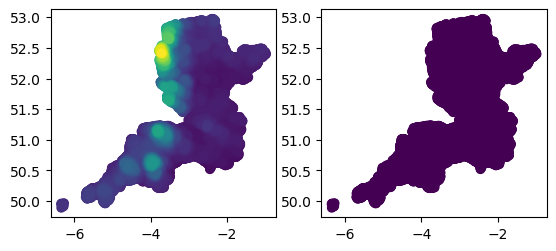

In [21]:
import matplotlib.pyplot as plt

by_basin = gpd.read_parquet("/Users/alison/Documents/RAPID/RAPID Input/w@h/hist/by_basin/wah_36.parquet")
by_basin_gdf = gpd.GeoDataFrame(by_basin, geometry=gpd.points_from_xy(by_basin.lon, by_basin.lat), crs=4326)

by_basin_coords = by_basin[['geometry']].drop_duplicates()
by_basin_gdf = by_basin_gdf.query('Month == 2 and Year == 1962')
by_basin_gdf = by_basin_gdf.sort_values(by='rainfall', ascending=True)


fig, ax = plt.subplots(1, 2)

by_basin_gdf.plot('rainfall', ax=ax[0])
by_basin_gdf.plot('rainfall_q50', ax=ax[1])

<Axes: >

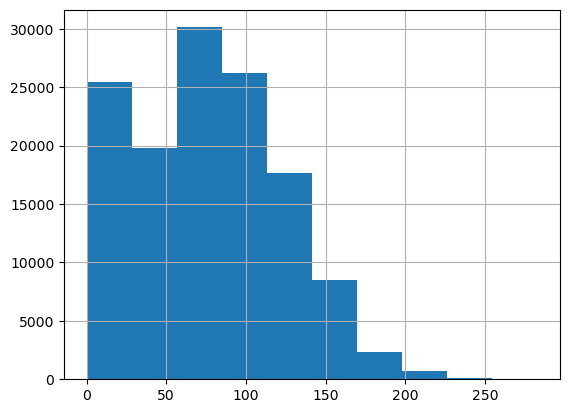

In [138]:
file[file['Month']==1]['rainfall'].hist()

In [130]:
wrz_row.RZ_ID

39

<Axes: >

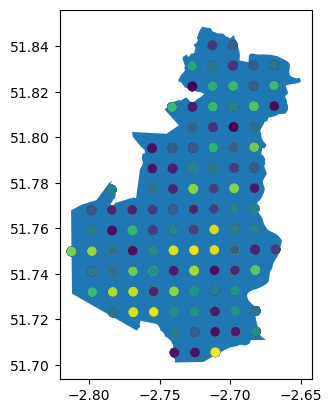

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

wrz[wrz['RZ_ID']==38].plot(ax=ax)
file_clip.plot('rainfall', ax=ax)
